<a href="https://colab.research.google.com/github/ciriatico/Data-Analytics/blob/master/WorkingWithData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
with open('/content/drive/My Drive/sample.txt', 'w') as f:
  f.write('Hello Google Drive')
!cat /content/drive/'My Drive'/sample.txt

Hello Google Drive

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv('drive/My Drive/automobile_data_final.csv')

In [35]:
print('Shape of the dataset is', data.shape)

Shape of the dataset is (159, 26)


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
symboling            159 non-null int64
normalized_losses    159 non-null int64
make                 159 non-null object
fuel_type            159 non-null object
aspiration           159 non-null object
num_of_doors         159 non-null object
body_style           159 non-null object
drive_wheels         159 non-null object
engine_location      159 non-null object
wheel_base           159 non-null float64
length               159 non-null float64
width                159 non-null float64
height               159 non-null float64
curb_weight          159 non-null int64
engine_type          159 non-null object
num_of_cylinders     159 non-null object
engine_size          159 non-null int64
fuel_system          159 non-null object
bore                 159 non-null float64
stroke               159 non-null float64
compression_ratio    159 non-null float64
horsepower           159 non-nu

In [37]:
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Text(0.5, 0, 'Make')

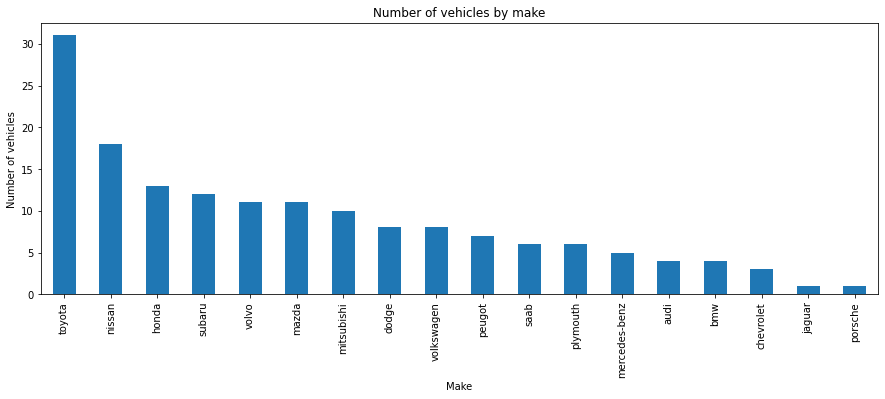

In [38]:
data.make.value_counts().plot(kind='bar', figsize=(15,5))

plt.title('Number of vehicles by make')
plt.ylabel('Number of vehicles')
plt.xlabel('Make')

In [0]:
data["safe"] = data["symboling"].isin(["-2", "-1", "0"])

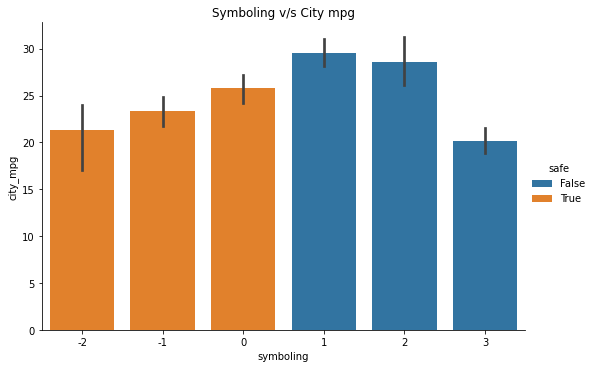

In [43]:
sns.catplot(x = "symboling", y = "city_mpg",
            hue = "safe", data = data,
            dodge = False, kind = "bar", aspect = 1.5)

plt.title("Symboling v/s City mpg")
plt.show()

IndexError: ignored

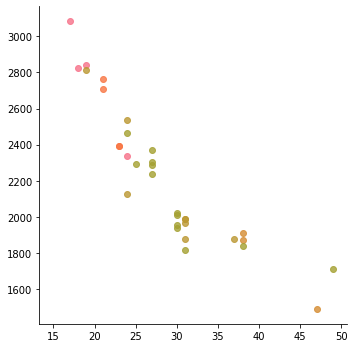

In [45]:
sns.lmplot('city_mpg', 'curb_weight',
            data, hue = 'make',
            fit_reg = False)

In [0]:
# Pacote interativo de gráficos do Colab

import altair as alt

In [0]:
plot = alt.Chart(data).mark_point().encode(
    x='horsepower',
    y='city_mpg',
    color='body_style').interactive()

In [22]:
plot

alt.Chart(...)

In [46]:
interval = alt.selection_interval()

base = alt.Chart(data).mark_point().encode(
         y = 'price',
         color = alt.condition(interval, 'fuel_system',
                               alt.value('lightgray'))).properties(selection=interval)

base.encode(x = 'city_mpg') | base.encode(x = 'horsepower')

alt.HConcatChart(...)

In [0]:
data = data.drop(['height', 'stroke', 'compression_ratio',
                  'num_of_doors', 'normalized_losses',
                  'engine_location', 'city_mpg'], axis=1)

In [47]:
# Para lidar com valores categóricos, get_dummies cria colunas boolenas para cada valor categórico

data = pd.get_dummies(data, drop_first=True)

data.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,safe,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_gas,aspiration_turbo,num_of_doors_two,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,fuel_system_2bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi
0,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110,5500,19,25,17710,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140,5500,17,20,23875,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101,5800,23,29,16430,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0


In [27]:
data.columns

Index(['symboling', 'make', 'fuel_type', 'aspiration', 'body_style',
       'drive_wheels', 'wheel_base', 'length', 'width', 'curb_weight',
       'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore',
       'horsepower', 'peak_rpm', 'highway_mpg', 'price'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 69 to 102
Data columns (total 55 columns):
symboling                 106 non-null int64
normalized_losses         106 non-null int64
wheel_base                106 non-null float64
length                    106 non-null float64
width                     106 non-null float64
height                    106 non-null float64
curb_weight               106 non-null int64
engine_size               106 non-null int64
bore                      106 non-null float64
stroke                    106 non-null float64
compression_ratio         106 non-null float64
horsepower                106 non-null int64
peak_rpm                  106 non-null int64
city_mpg                  106 non-null int64
highway_mpg               106 non-null int64
safe                      106 non-null bool
make_bmw                  106 non-null uint8
make_chevrolet            106 non-null uint8
make_dodge                106 non-null uint8
make_honda                

In [52]:
model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

1372.035405613207
3465620.3056964152
0.8718920391506656


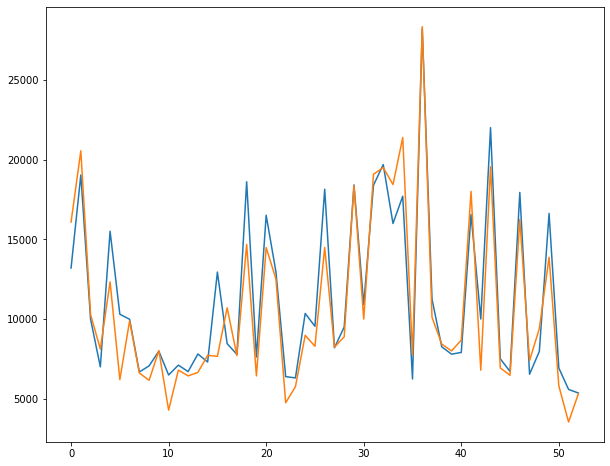

In [53]:
plt.figure(figsize=(10,8))

plt.plot(y_test.values)
plt.plot(pred)